In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ipywidgets import *
import scipy.linalg
import cubehelix #https://github.com/jradavenport/cubehelix

In [3]:
mpl.rcParams.update({'font.size': 18, 'text.usetex': True})
mpl.rcParams.update({'axes.linewidth':1.5})
mpl.rcParams.update({'axes.labelsize':'large'})
mpl.rcParams.update({'xtick.major.size':6})
mpl.rcParams.update({'xtick.minor.size':4})
mpl.rcParams.update({'ytick.major.size':6})
mpl.rcParams.update({'ytick.minor.size':4})
mpl.rcParams.update({'xtick.major.width':1.5})
mpl.rcParams.update({'xtick.minor.width':1.0})
mpl.rcParams.update({'ytick.major.width':1.5})
mpl.rcParams.update({'ytick.minor.width':1.0})
mpl.rcParams.update({'legend.frameon':False,'legend.framealpha':0.0})
# mpl.rcParams.update({'axes.grid':True})

In [4]:
def H_SSH_real_Alt3(L,v,w):
    '''
    Una función que construye una cadena SSH finita.
    El número de celdas unitarias es L.
    v es el parámetro de salto en la celda (intracell).
    w es el parámetro de salto entre celdas (intercell).
    '''
    idL = eye(L,dtype="complex");               # identity matrix of dimension L
    odL = diag(ones(L-1),1);    # upper off diagonal matrix with ones of size L
    U   = matrix([[0,1],[1,0]],dtype="complex") # intracell
    T   = matrix([[0,0],[1,0]],dtype="complex") # intercell
    return kron(idL,v*U)+kron(odL,w*T)+kron(odL,w*T).H

In [5]:
v = 0.6; w =1.0; L = 10
Ek,ψk = eig(H_SSH_real_Alt3(L,v,w))

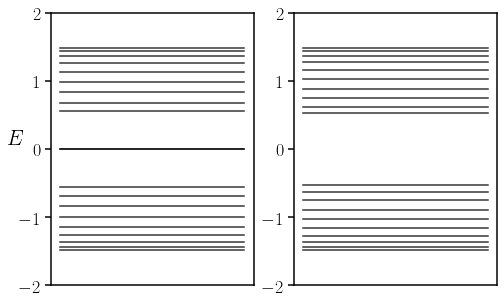

In [15]:
v = 0.5; w =1.0; L = 10
Ek1,ψk2 = eig(H_SSH_real_Alt3(L,v,w))

v = 1.0; w =0.5; L = 10
Ek2,ψk2 = eig(H_SSH_real_Alt3(L,v,w))

fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(8,5))
for E in Ek1:
    ax[0].plot([0.4,0.6],[E.real,E.real],'k',alpha=0.8)
for E in Ek2:
    ax[1].plot([0.4,0.6],[E.real,E.real],'k',alpha=0.8)

    
ax[0].set_ylim(-2,2)
ax[1].set_ylim(-2,2)

ax[1].set_yticks([-2,-1,0,1,2]);
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[0].set_ylabel(r"$E$",rotation=0)
fig.savefig("FiniteChain_ex.png")

In [7]:
@interact(n=(0,2*L-1))
def PLOT_STATE(n=L):
    
    ψ = array( ψk[:, n] )
    ψ2 = conjugate(ψ)*ψ
    ψ2 = ψ2.transpose()[0]
    ψ2 = ψ2.real
    
    fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(12,5))
    
    x = arange(2*L)
    ax[0].bar(x,ψ2)
    ax[0].set_ylabel(r"$|\Psi|^2$")
    ax[0].set_xlabel(r"$m$")
    
    
    for E in Ek:
        ax[1].plot([0.4,0.6],[E.real,E.real],'k',alpha=0.6)
    ax[1].plot([0.4,0.6],[Ek[n].real,Ek[n].real],'--r')
        
    ax[1].set_xlim(0,1)

interactive(children=(IntSlider(value=10, description='n', max=19), Output()), _dom_classes=('widget-interact'…

## Ordenar visualización

In [6]:
v = 1.0; w =1.0; L = 20
Ek,ψk = eig(H_SSH_real_Alt3(L,v,w))
print( 'Checar parte imaginaria despreciable:', Ek[abs(Ek.imag)>1e-10] )
Ek = Ek.real
indx  = argsort(Ek)

Checar parte imaginaria despreciable: []


In [7]:
@interact(n=(0,2*L-1))
def PLOT_STATE(n=L):
    
    ψ = array( ψk[:, indx[n]] )
    ψ2 = conjugate(ψ)*ψ
    ψ2 = ψ2.transpose()[0]
    ψ2 = ψ2.real
    
    fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(12,5))
    
    x = arange(2*L)
    ax[0].bar(x,ψ2)
    ax[0].set_ylabel("|ψ|²")
    ax[0].set_xlabel("m")
    
    
    for E in Ek:
        ax[1].plot([0.4,0.6],[E,E],'k',alpha=0.6)
    ax[1].plot([0.4,0.6],[Ek[indx[n]],Ek[indx[n]]],'--r')
        
    ax[1].set_xlim(0,1)

interactive(children=(IntSlider(value=20, description='n', max=39), Output()), _dom_classes=('widget-interact'…

## More

In [8]:
v = 1.0; w =1.0; L = 20; nv = 600
v_range = linspace(0,3,nv)
Eeigen = []
IPR    = []
for v in v_range:
    Ek,ψk = scipy.linalg.eig(H_SSH_real_Alt3(L,v,w))
    # print( 'Checar parte imaginaria despreciable:', Ek[abs(Ek.imag)>1e-10] )
    Ek = Ek.real
    indx  = argsort(Ek)
    Eeigen.append( Ek[indx] )
    
    currentipc = []
    for uk in ψk.T:
        tempipc = np.sum(np.abs(uk)**4.0)/(np.vdot(uk,uk))**2.0
        currentipc.append(tempipc)
    currentipc = array(currentipc)
    IPR.append(currentipc[indx])
IPR = array(IPR).T   
Eeigen = array(Eeigen).T

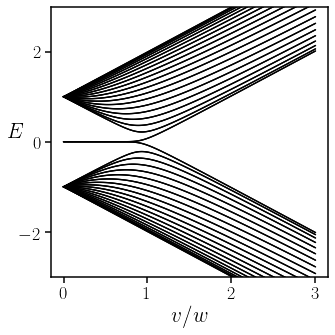

In [145]:
newcmap = cubehelix.cmap(reverse=True, start=-0.5, rot=0.3)

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(5,5))
y  = Eeigen
sh = shape(y)
zmin = np.log(0.5/L); zmax = np.log(0.5)
x  = v_range.repeat(2*L).reshape(nv,2*L).T
z  = IPR.real
#sc = ax.scatter(x,y,s=4.0,c=float32(z),edgecolors='none',cmap='Blues')
ax.scatter(x,y,s=2.0,c='k',edgecolors='none')
ax.set_ylim(-3,3)
ax.set_xlabel(r"$v/w$");
ax.set_ylabel(r'$E$',rotation=0);
ax.set_yticks([-2,0,2]);
fig.tight_layout()
fig.savefig('finite_v.png')

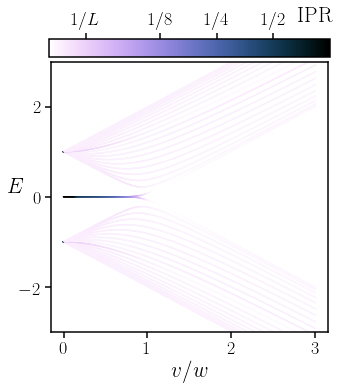

In [146]:
newcmap = cubehelix.cmap(reverse=True, start=-0.5, rot=0.3)

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(5,5))
y  = Eeigen
sh = shape(y)
x  = v_range.repeat(2*L).reshape(nv,2*L).T
z  = log( IPR.real )
sc=ax.scatter(x,y,s=2.0,c=float32(z),edgecolors='none',cmap=newcmap)
ax.set_ylim(-3,3)
ax.set_xlabel(r"$v/w$");
ax.set_ylabel(r'$E$',rotation=0);
ax.set_yticks([-2,0,2]);
fig.tight_layout()
cax  = fig.add_axes([0.17, 0.96, 0.78, 0.05])
cbar = fig.colorbar(sc,cax=cax,orientation='horizontal')
cbar.ax.xaxis.set_ticks_position('top')
cbar.set_label(r"${\rm IPR}$",labelpad=-50,x=0.95)
norm = mpl.colors.Normalize(vmin=np.log(0.5/L),vmax=np.log(1.0/2.0))
cbar.set_ticks( np.log(np.array( [1.0/L,0.125,0.25,1.0/2.0001])) )
cbar.set_ticklabels([r"$1/L$",r"$1/8$",r"$1/4$",r"$1/2$"])
fig.savefig('finite_v_IPR.png',bbox_inches='tight')

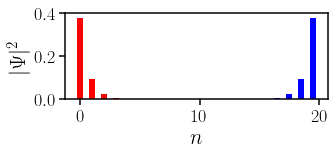

In [142]:
L=20; n=20
w = 1; v= 0.5
Ek,ψk = scipy.linalg.eig(H_SSH_real_Alt3(L,v,w))

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(5,2.5))
ψ = array( ψk.T[n] )
ψ2 = conjugate(ψ)*ψ
ψ2 = ψ2.transpose()
ψ2 = ψ2.real

x = arange(2*L)/2
ax.bar(x[0::2],ψ2[0::2],color='r',width=0.5)
ax.bar(x[1::2],ψ2[1::2],color='b',width=0.5)

ax.set_ylabel(r"$|\Psi|^2$");
ax.set_xlabel(r"$n$");
ax.set_ylim(0,0.4)
ax.set_yticks([0,0.2,0.4]);
fig.tight_layout()
fig.savefig('finite_edge20.png')

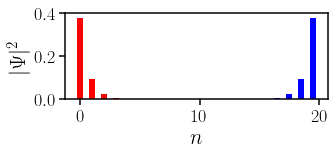

In [143]:
L=20; n=19
w = 1; v= 0.5
Ek,ψk = scipy.linalg.eig(H_SSH_real_Alt3(L,v,w))

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(5,2.5))
ψ = array( ψk.T[n] )
ψ2 = conjugate(ψ)*ψ
ψ2 = ψ2.transpose()
ψ2 = ψ2.real

x = arange(2*L)/2
ax.bar(x[0::2],ψ2[0::2],color='r',width=0.5)
ax.bar(x[1::2],ψ2[1::2],color='b',width=0.5)

ax.set_ylabel(r"$|\Psi|^2$");
ax.set_xlabel(r"$n$");
ax.set_ylim(0,0.4)
ax.set_yticks([0,0.2,0.4]);
fig.tight_layout()
fig.savefig('finite_edge19.png')

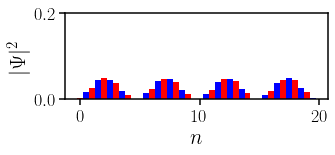

In [144]:
L=20; n=3
w = 1; v= 0.5
Ek,ψk = scipy.linalg.eig(H_SSH_real_Alt3(L,v,w))

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(5,2.5))
ψ = array( ψk.T[n] )
ψ2 = conjugate(ψ)*ψ
ψ2 = ψ2.transpose()
ψ2 = ψ2.real

x = arange(2*L)/2
ax.bar(x[0::2],ψ2[0::2],color='r',width=0.5)
ax.bar(x[1::2],ψ2[1::2],color='b',width=0.5)

ax.set_ylabel(r"$|\Psi|^2$");
ax.set_xlabel(r"$n$");
ax.set_ylim(0,0.2)
ax.set_yticks([0,0.2]);
fig.tight_layout()
fig.savefig('finite_edge3.png')

## Alternativa de visualización

In [14]:
import cubehelix #https://github.com/jradavenport/cubehelix

In [15]:
%%time

v = 0.6; w =1.0; L = 100
Ek,ψk = eig(H_SSH_real_Alt3(L,v,w))
print( 'Checar parte imaginaria despreciable:', Ek[abs(Ek.imag)>1e-10] )
Ek = Ek.real
indx  = argsort(Ek)

Checar parte imaginaria despreciable: []
CPU times: user 208 ms, sys: 3.87 ms, total: 211 ms
Wall time: 114 ms


In [16]:
newcmap = cubehelix.cmap(reverse=True, start=-0.5, rot=0.3)

@interact(n=(0,2*L-1))
def PLOT_STATE(n=L):
    
    ψ = array( ψk[:, indx[n]] )
    ψ2 = conjugate(ψ)*ψ
    ψ2 = ψ2.transpose()[0]
    ψ2 = ψ2.real
    
    indxψ2 = argsort(ψ2)
    
    fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(12,2))
    
    x = arange(2*L)

    ax.scatter(x[indxψ2],zeros(2*L),s=40,c=np.float32(ψ2[indxψ2]),
               edgecolors='none',cmap=newcmap)
    ax.set_ylim(-1e-6,1e-6)
    
    ax.axis('off')
    
    ax.plot([-2,-2],[-1e-7,1e-7],'k')
    ax.plot([2*L+1,2*L+1],[-1e-7,1e-7],'k')
    
    ax.set_title("Ek={0:.2f}".format(Ek[indx[n]]))

    # ax[0].set_ylabel("|ψ|²")
    # ax[0].set_xlabel("m")
    
    
    #for E in Ek:
    #    ax[1].plot([0.4,0.6],[E,E],'k',alpha=0.6)
    #ax[1].plot([0.4,0.6],[Ek[indx[n]],Ek[indx[n]]],'--r')
        
    #ax[1].set_xlim(0,1)

interactive(children=(IntSlider(value=100, description='n', max=199), Output()), _dom_classes=('widget-interac…

## Densidad de estados

In [17]:
%%time

v = 0.6; w =1.0; L = 1000
Ek,ψk = eig(H_SSH_real_Alt3(L,v,w))
print( 'Checar parte imaginaria despreciable:', Ek[abs(Ek.imag)>1e-10] )
Ek = Ek.real

Checar parte imaginaria despreciable: []
CPU times: user 28.8 s, sys: 344 ms, total: 29.2 s
Wall time: 14.9 s


Text(0, 0.5, 'DOS(E)')

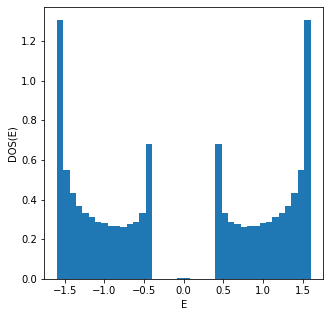

In [18]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(5,5))
ax.hist(Ek, 40,density=True);
ax.set_xlabel('E')
ax.set_ylabel('DOS(E)')